# Linear Regression with Single variable with TensorFlow

The aim of this notebook is to provide a basic understanding of Linear Regression with a single variable.<br>
Once the understaning is clear we will implement a linear regression model in TensolrFlow 


So what exactly is Linear Regression ?<br>
Lets have a look.

### Understanding Linear Regression

Consider a very simple mathametical game you might have where you are given a two sequence of numbers where you have to guess the next number.
To make things simpler to lets take the below seqeunce.<br>

<b>Sequence 1 (x):-</b>  1,2,3,4,5<br>
<b>Sequence 2 (y):-</b>  3,6,9,12,15<br>

Now you are given a new number in x say 6 and are asked to guess wht the value of y would be.<br>
You can easily guess it as  18. However is there any method for properly arriving at this value??<br>
Here is where Linear Regerssion comes in handy



To understand the above topic we need first understand the three words that make up the topic<br>
<b> 1.) Regression </b> It is a statistical method to determine the relationship between dependent variable and one or many independent vairalbes. In our above example x is the independet vaariable while y is the dependent variable i.e it depends on x.<br> 
<b> 2.) Linear </b> The highest degree of any independent variable in is 1.<br>
<b> 3.) Single variable </b> The is only one independent variable.<br>

Having understood these terms lets the the relationship between x & y<br>

\begin{align}
y & = \theta*x \\
\end{align}


Here we need to loss a cost function so that the difference between the predicted values and the actual values of Y are as less as possible<br>
Lets define it 

\begin{align}
J(\theta) & = \frac{1}{2m}\sum_{i=1}^m  (\theta x^{(i)}-y^{(i)})^2 \\
\end{align}


This is the function that we need to minimize where i is number of exapmles which is 5 in our case

### Gradient Descent

Here I will not be explaining Gradient descent but will present the equations required for Gradient descent<br>
Our goal is to find out the value of \begin{align}\theta \end{align}

such that

\begin{align}
J(\theta)  
\end{align}

is mimnimum.

The basic rule for graident descent is as given below:-

\begin{align}
\theta & :=  \theta - \alpha \frac{d}{d\theta} J(\theta) 
\end{align}


\begin{align}
\frac{d}{d\theta} J(\theta) = \frac{1}{m}\sum_{i=1}^m  (\theta  (x^{(i)})^2-y^{(i)} x^{(i)}) \\
\end{align}


Now that we have an understanding lets move to tensorflow.Tensor Flow is an open source software Library developed by google.<br>
Not that in tensorflow we do not need to implement the Gradient desent equation as it is taken care of by tensorflow itself<br>
Lets start with TensorFlow

Import all the essential stuff

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Here x and y are place holders they represent the inputs to our model and correspond to x & y of our above example<br>
W is a variable and while change. It correspneds to theta in our above example
On the end we define the relationship between x & y

In [2]:
x = tf.placeholder(tf.float32, [None,1],name='x')
y = tf.placeholder(tf.float32, [None,1],name='y')
W = tf.Variable([5.0], tf.float32)
linear_model=tf.multiply(W,x)

In [3]:
x_arr=np.array([1,2,3,4,5])
y_arr=np.array([4,8,12,16,20])
x_arr=x_arr.reshape(5,1)
y_arr=y_arr.reshape(5,1)

We then define the cost function and the Gradient Descent optimizer

In [4]:
loss = tf.reduce_sum(tf.sqrt(tf.square(tf.subtract(linear_model,y))))/5
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

In [5]:
sess = tf.Session()
sess.run(init)

In [6]:
weight_plot=[]
for i in range(500):
    _,loss_val,W_val=sess.run([train , loss , W], feed_dict = {x: x_arr, y: y_arr})
    weight_plot.append([i,loss_val,W_val])

In [7]:
x_pred_temp=np.array([6,7,8,9,10])
x_pred=x_pred_temp.reshape(5,1)
y_pred = sess.run(linear_model, feed_dict={x:x_pred})

In [8]:
sess.close()

In [9]:
x_arr=np.array([1,2,3,4,5])
y_arr=np.array([4,8,12,16,20])
result_final=float(weight_plot[len(weight_plot)-1][2])

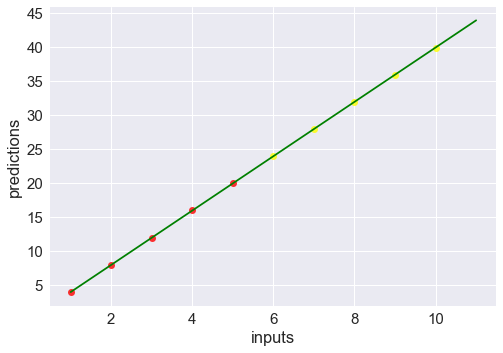

In [10]:
sns.set(style="darkgrid", font_scale=1.5)
func = np.arange(1.0, 11.1,0.1)
x_arr=np.array([1,2,3,4,5])
y_arr=np.array([4,8,12,16,20])
pred_x = sns.regplot(x_arr, y_arr,fit_reg=False,color="red");
ax = sns.regplot(x_pred_temp, y_pred,fit_reg=False,color="yellow");
ax.set(xlabel='inputs', ylabel='predictions')
plt.plot (func, func*result_final ,color="green")
plt.show()

Here we see a perfect linear relationship between the dependent and independent variables<br>
The green line represents the function predicted by our model while the red points represent the input to the model.
The yelloe points reprent the output predicted by the model 

Lets also plot the cost,W over iterations

In [11]:
iteration=[]
losses=[]
weights=[]
for i in range(len(weight_plot)):
    iteration.append(weight_plot[i][0])
    losses.append(weight_plot[i][1])
    weights.append(weight_plot[i][2])

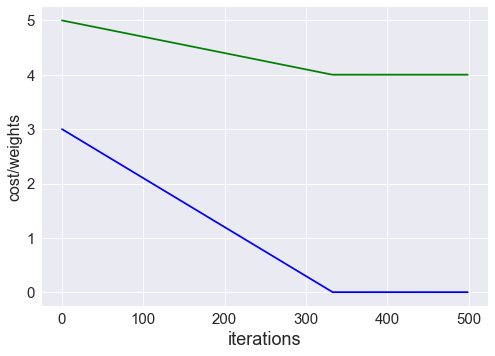

In [12]:
sns.set(style="darkgrid", font_scale=1.5)
plt.plot (iteration, weights ,color="green")
plt.plot (iteration, losses ,color="blue")
plt.xlabel('iterations', fontsize=18)
plt.ylabel('cost/weights', fontsize=16)
plt.show()

Here we clearly see that cost decreases to 0 while W gets stabilized at 4.<br>
The value thus matches with our intutuion i.e. 4